# Assignment #5

## Due: November 12, 2020

Read in the [Volcano eruptions](https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv) data from the TidyTuesday project with `read_csv`.

Use the `print` function to find the number of rows and columns in the data.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [6]:
volcano = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-12/eruptions.csv")
volcano %>% print

Parsed with column specification:
cols(
  volcano_number = col_double(),
  volcano_name = col_character(),
  eruption_number = col_double(),
  eruption_category = col_character(),
  area_of_activity = col_character(),
  vei = col_double(),
  start_year = col_double(),
  start_month = col_double(),
  start_day = col_double(),
  evidence_method_dating = col_character(),
  end_year = col_double(),
  end_month = col_double(),
  end_day = col_double(),
  latitude = col_double(),
  longitude = col_double()
)



# A tibble: 11,178 x 15
   volcano_number volcano_name eruption_number eruption_catego… area_of_activity
            <dbl> <chr>                  <dbl> <chr>            <chr>           
 1         266030 Soputan                22354 Confirmed Erupt… NA              
 2         343100 San Miguel             22355 Confirmed Erupt… NA              
 3         233020 Fournaise, …           22343 Confirmed Erupt… NA              
 4         345020 Rincon de l…           22346 Confirmed Erupt… NA              
 5         353010 Fernandina             22347 Confirmed Erupt… NA              
 6         273070 Taal                   22344 Confirmed Erupt… NA              
 7         282050 Kuchinoerab…           22345 Confirmed Erupt… NA              
 8         241040 Whakaari/Wh…           22338 Confirmed Erupt… 1978/90 Crater …
 9         311060 Semisopochn…           22341 Confirmed Erupt… NA              
10         284096 Nishinoshima           22340 Confirmed Erupt… NA              
# … 

Using `group_by`, `summarize` (or `count`), and `arrange`, find the volcano with the most recorded eruptions in the data. Remeber the [desc](https://dplyr.tidyverse.org/reference/desc.html) function can be used to sort in descending order.

In [47]:
volcano_eruptions %>%
    group_by(volcano_name) %>% 
    summarize(total_eruption_number = length(volcano_name)) %>%
    arrange(desc(total_eruption_number)) %>%
    head(1)

`summarise()` ungrouping output (override with `.groups` argument)



volcano_name,total_eruption_number
<chr>,<int>
Etna,241


Using `filter` and `arrange`, what is the year of the most recent eruption for the volcano above (i.e. the volcano with the most recorded eruptions in the data)? 

In [18]:
volcano_eruptions %>%
    filter(volcano_name == 'Etna') %>%
    select(start_year) %>% #did this based on when the eruption started
    arrange(desc(start_year)) %>%
    head(1)

start_year
<dbl>
2013


Make a bar chart of eruption count by volcano_name. The bars should be sorted by frequency using `fct_infreq`. "Lump" the low frequency values into an "Other" category with `fct_lump`.

**Bonus:** Can you force the "Other" category to be the *last* bar?

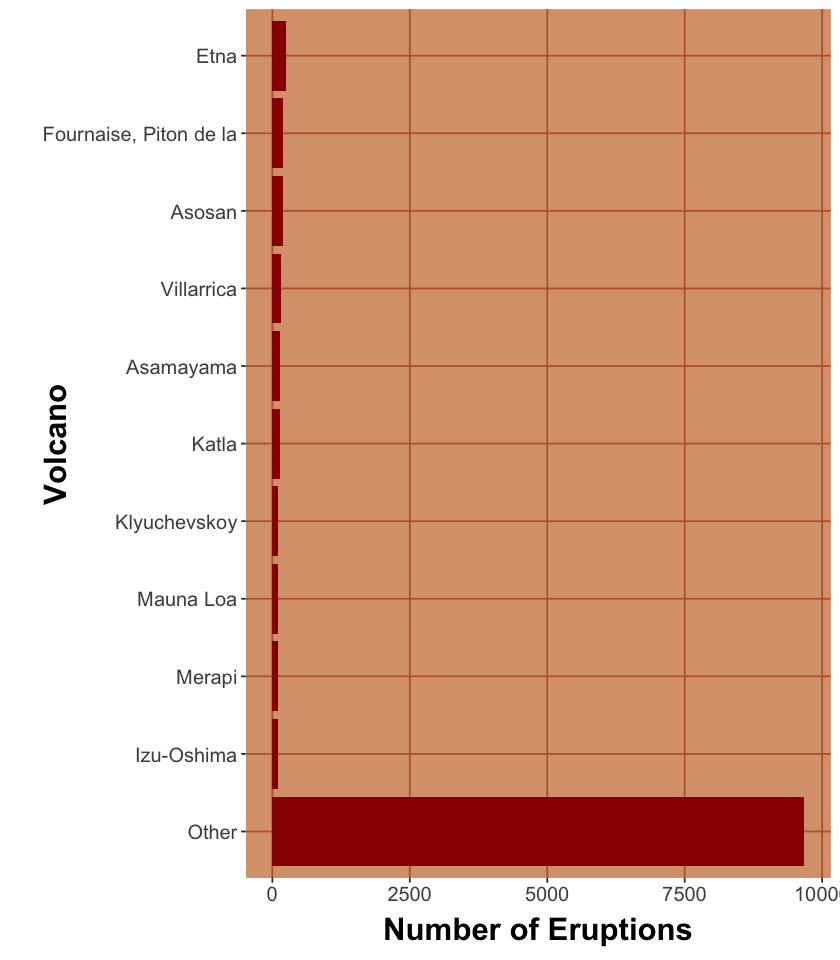

In [165]:
volcano$volcano_name = factor(volcano$volcano_name)

options(repr.plot.width = 7, repr.plot.height = 8) #changing size
ggplot() + 
  geom_bar(data = volcano, aes(y = volcano_name %>%
              fct_lump(n = 10) %>%
              fct_infreq() %>%
              fct_relevel('Other', after = Inf) %>% 
              fct_rev()), fill = '#980000') +
  theme(legend.position = 'none',
       axis.title.x = element_text(face = "bold", size = rel(1.7), vjust = -0.75, margin = margin(b = 10)), #changes x axis 
       axis.title.y = element_text(face = "bold", size = rel(1.7), vjust = -4), #changes y axis
       axis.text = element_text(size = 12), #axis text
       panel.grid.minor = element_blank(), #removed minor grid lines
       panel.grid = element_line(color = "#ba643b"), #making grid lines gray
       panel.background = element_rect(fill = '#d8a17c'),
       ) +  
  xlab('Number of Eruptions') + ylab('Volcano')

Using `mutate` generate a column that represents the span of each eruption in years (i.e. "end_year" minus "start_year"). Use `filter` to exclude eruption spans shorter than ten years. 

- Plot a histogram of your generated column (i.e. eruption spans greater than ten years).
- Which volcano(s) has/have the longest eruption span in years? How long did the eruption last?

In [119]:
mutated_volcano = volcano %>%
    mutate(eruption_span = end_year - start_year) %>%
    filter(eruption_span > 10) 

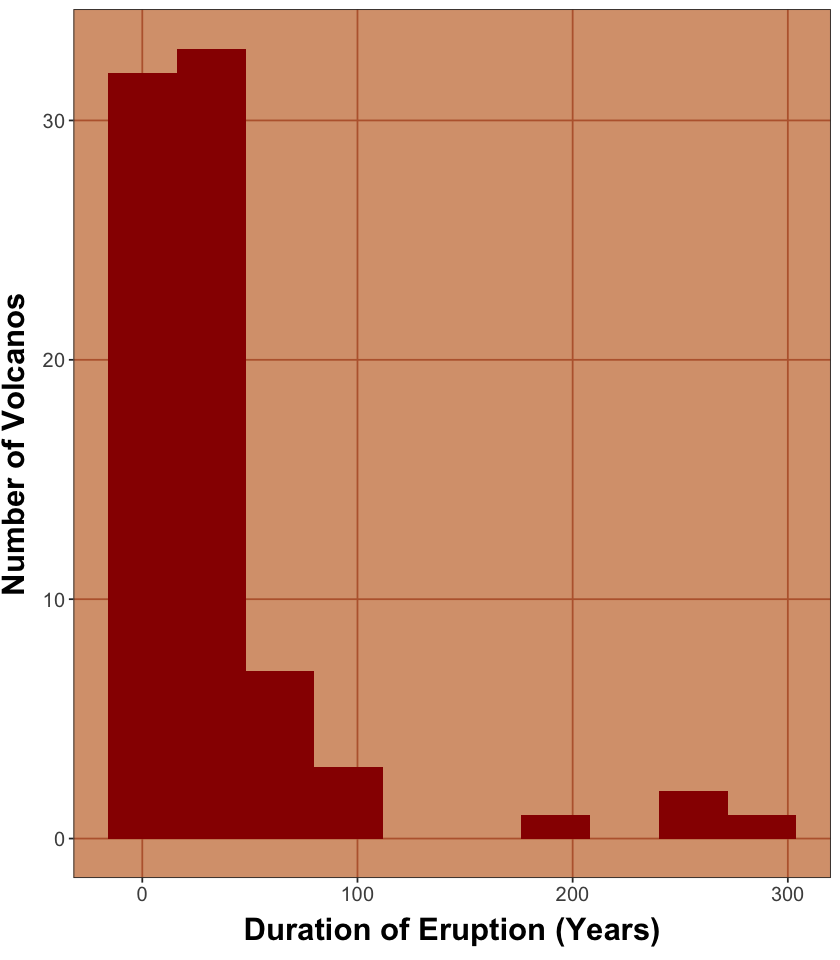

In [164]:
ggplot(data = mutated_volcano) + 
  geom_histogram(aes(x = eruption_span), fill = '#980000', bins = 10) +  
  theme_bw() + 
  theme(axis.title.x = element_text(face = "bold", size = rel(1.7), vjust = -0.75, margin = margin(b = 10)), #changes x axis 
       axis.title.y = element_text(face = "bold", size = rel(1.7), vjust = 2), #changes y axis
       panel.grid.minor = element_blank(), #removed minor grid lines
       axis.text = element_text(size = 12), #axis text
       panel.grid = element_line(color = "#ba643b"), #making grid lines gray
       panel.background = element_rect(fill = '#d8a17c'),
       ) +  
  ylab('Number of Volcanos') + xlab('Duration of Eruption (Years)')

In [138]:
mutated_volcano %>%
    arrange(desc(eruption_span)) %>%
    select(volcano_name,eruption_span) %>%
    head(1)
# Stromboli had the longest eruption span, which lasted for 299 years

volcano_name,eruption_span
<fct>,<dbl>
Stromboli,299
